In [74]:
import tensorflow as tf
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import json
import string
from sklearn.preprocessing import LabelEncoder
import random

In [3]:
with open('Intent.json') as content:
    data1=json.load(content)

In [5]:
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        tags.append(intent['intent'])

In [7]:
tags[:10]

['Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse']

In [9]:
inputs[:10]

['Hi',
 'Hi there',
 'Hola',
 'Hello',
 'Hello there',
 'Hya',
 'Hya there',
 'My user is Adam',
 'This is Adam',
 'I am Adam']

In [16]:
responses['Greeting']

['Hi human, please tell me your GeniSys user',
 'Hello human, please tell me your GeniSys user',
 'Hola human, please tell me your GeniSys user']

In [21]:
for i in data1['intents']:
    print (i['intent'])

Greeting
GreetingResponse
CourtesyGreeting
CourtesyGreetingResponse
CurrentHumanQuery
NameQuery
RealNameQuery
TimeQuery
Thanks
NotTalking2U
UnderstandQuery
Shutup
Swearing
GoodBye
CourtesyGoodBye
WhoAmI
Clever
Gossip
Jokes
PodBayDoor
PodBayDoorResponse
SelfAware


In [22]:
data=pd.DataFrame({'inputs':inputs,
                  'tags':tags})

In [23]:
data

,inputs,tags
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
...,...,...
138,Can you prove you have a conscious,SelfAware
139,Can you prove you are self-aware please,SelfAware
140,Can you prove you are self aware please,SelfAware
141,Can you prove you have a conscious please,SelfAware


In [25]:
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data

,inputs,tags
0,hi,Greeting
1,hi there,Greeting
2,hola,Greeting
3,hello,Greeting
4,hello there,Greeting
...,...,...
138,can you prove you have a conscious,SelfAware
139,can you prove you are selfaware please,SelfAware
140,can you prove you are self aware please,SelfAware
141,can you prove you have a conscious please,SelfAware


In [30]:
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])
X_train=pad_sequences(train)

In [32]:
X_train

array([[ 0,  0,  0, ...,  0,  0, 48],
       [ 0,  0,  0, ...,  0, 48, 49],
       [ 0,  0,  0, ...,  0,  0, 63],
       ...,
       [ 0, 10,  1, ..., 79, 80, 13],
       [ 0, 10,  1, ..., 16, 62, 13],
       [ 0,  0,  0, ..., 61, 16, 62]])

In [34]:
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [35]:
y_train

array([ 7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4, 10, 10, 10, 10, 10, 10, 14, 14, 14, 14, 14, 14, 14, 19,
       19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 11, 11, 11, 11, 11,
       11, 11, 20, 20, 20, 20, 20, 20, 16, 16, 16, 16, 16, 16, 16, 17, 17,
       17, 17,  5,  5,  5,  5,  1,  1,  1,  1,  1,  1, 21, 21, 21, 21, 21,
       21,  0,  0,  0,  0,  0,  0,  0,  6,  6,  6,  6,  6,  6,  9,  9,  9,
        9,  9,  9, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       15, 15, 15, 15, 15, 15, 15])

In [37]:
input_shape=X_train.shape[1]
input_shape

9

In [38]:
vocabulary=len(tokenizer.word_index)
print('Number of unique words: ',vocabulary)
output_length=le.classes_.shape[0]
print('Output length: ',output_length)

Number of unique words:  117
Output length:  22


In [43]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation='softmax')(x)
model=Model(i,x)

In [44]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 9, 10)               │           1,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 9, 10)               │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 90)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 22)                  │           2,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,022 (15.71 KB)

 Trainable params: 4,022 (15.71 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history=model.fit(X_train,y_train,epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0116 - loss: 3.0921   
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0238 - loss: 3.0887     
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0995 - loss: 3.0857 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1392 - loss: 3.0816 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2026 - loss: 3.0789 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1875 - loss: 3.0755 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2156 - loss: 3.0706 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2630 - loss: 3.0656 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2076 - loss: 3.0625 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2529 - loss: 3.0542 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2542 - loss: 3.0462 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2205

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9443 - loss: 0.4678 
Epoch 138/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9091 - loss: 0.5046 
Epoch 139/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9098 - loss: 0.4930 
Epoch 140/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.4801 
Epoch 141/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9692 - loss: 0.4099 
Epoch 142/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9464 - loss: 0.4205 
Epoch 143/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9684 - loss: 0.4127
Epoch 144/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9520 - loss: 0.4395 
Epoch 145/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9643 - loss: 0.4238 
Epoch 146/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9608 - loss: 0.4071 
Epoch 147/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9591 - loss: 0.4139 
Epoch 148/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.963

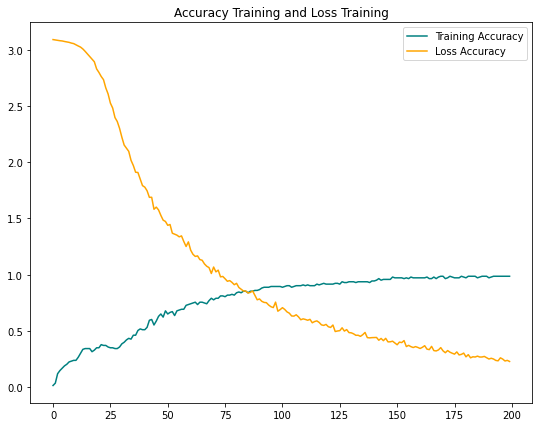

In [50]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(history.history['loss'],color='orange',label='Loss Accuracy')
plt.title('Accuracy Training and Loss Training')
plt.legend()
plt.show()

In [61]:
while True:
    text_p=[]
    prediction_input=input('You: ')
    prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input=''.join(prediction_input)
    text_p.append(prediction_input)
    prediction_input=tokenizer.texts_to_sequences(text_p)
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],input_shape)
    output=model.predict(prediction_input)
    output=output.argmax()
    response_tag=le.inverse_transform([output])[0]
    print('Going Merry: ',random.choice(responses[response_tag]))
    if response_tag=='goodbye':
        break

You: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Going Merry:  Hi human, please tell me your GeniSys user
You: tell me a joke
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Going Merry:  A snake slithers into a pub and up to the bar. The landlord says, 'I'm sorry, but I can't serve you.' 'What? Why not?' asks the snake. 'Because', says the landlord, 'You can't hold your drink.'
You: What is my name
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Going Merry:  Your name is  <HUMAN>, how can I help you?
You: You are very celever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Going Merry:  Thank you, I was trained that way
You: goodbye
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Going Merry:  See you later


KeyboardInterrupt: Interrupted by user

In [73]:
model.save('C:/Users/power/3D Objects.keras')